# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning

**Name:**

**Username:**

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo" https://www.uio.no/english/about/regulations/studies/studies-examinations/routines-cheating.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, April 22, 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the exercise
This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

The master students will also have to do one extra part about tuning PCA to balance compression with information lost.


### Tools
You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encurage the use of `scikit-learn` to iterate quickly on the problems.

### Beware
This is a new assignment. There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your
own and explain them!

## Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

### Principle of Maximum Variance: what is PCA supposed to do?
First of all, let us recall the principle/assumption of PCA:

1. What is the variance?
3. What is the covariance?
3. How do we compute the covariance matrix?
2. What is the meaning of the principle of maximum variance?
4. Why do we need this principle?
5. Does the principle always apply?

**Answers:** Enter your answers here.
1. Variance is a measure of variation within a dataset or statistical distribution. 


2. Covariance can then be described as a measure of dependence of two different variables. By dependence I mean the correlation between two random variables. 


3. We start by computing the covariance for each pair of variables/datapoints in the dataset. Before we proceed any furhter, it's important to notice that the covariance matrix is symmetric, thus cov(xi, xj) = cov(xj, xi). The elements along the leading diagonal of the covariance matrix are the variances for each of the variables in the covariance matrix. 


4. The principle of maxmiumm variance is the idea behind PCA, and tells us that the principal component is found in the direction of data with the largest variation, one containing most infomration about the dataset. As stated by Marsland, given a data matrix X, we want to rotate it in such a way, that the data lies along the directions of maximum variance. 


5. We need the principle of maximum variance, as it enables us to find those dimmensions in the dataset that are redundant, and conntribute little of meaningful data we can use. Brefly said, we need it to find most useful features of individuals in the dataset, and compress the total number of dimensions to the minimum needed while simultaneously minimasing the loss of significant information about the data. 


6. Principle of maximum variance cannot be applied in situation when we cannot draw an axis along the datapoints. An example of such dataset is a circle, as there is no direction in which the variation is larger than any other direction. 

## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.

In [2]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)
    
    mean_of_data = np.mean(A, axis=0)
    A -= mean_of_data

    return A

Test your function checking the following assertion on *testcase*:

In [3]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.

In [4]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.
    
    C = np.cov(A.T)
    
    return C

Test your function checking the following assertion on *testcase*:

In [5]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)
print(to_test)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

[[105.      52.5     26.25  ]
 [ 52.5     26.25    13.125 ]
 [ 26.25    13.125    6.5625]]


### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!

In [6]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    
    eigval, eigvec = np.linalg.eig(A)
    
    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real
    return eigval, eigvec

Test your function checking the following assertion on *testcase*:

In [7]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.

In [8]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors
    indices = np.argsort(eigval)[::-1]
    sorted_eigval = eigval[indices]
    sorted_eigvec = eigvec[:,indices]
    
    return sorted_eigval, sorted_eigvec

Test your function checking the following assertion on *testcase*:

In [9]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])

x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.

In [10]:
def pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)
    
    
    centered_A = center_data(A)
    cov_matrix = compute_covariance_matrix(centered_A)
    eigval, eigvec = compute_eigenvalue_eigenvectors(cov_matrix)
    
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)

    
    pca_eigvec = sorted_eigvec[:,0:m]
    P = np.dot(pca_eigvec.T, centered_A.T)
    
    return pca_eigvec, P.T

Test your function checking the following assertion on *testcase*:

In [11]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)


test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))


test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).

In [12]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

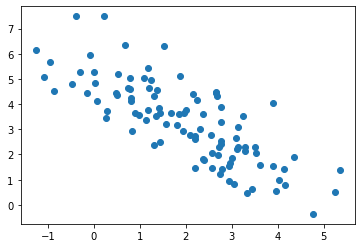

In [13]:
plt.scatter(X[:,0],X[:,1])

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

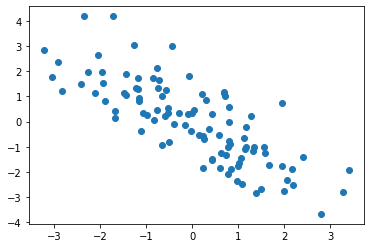

In [14]:
X2 = center_data(X)
plt.scatter(X2[:,0],X2[:,1])

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

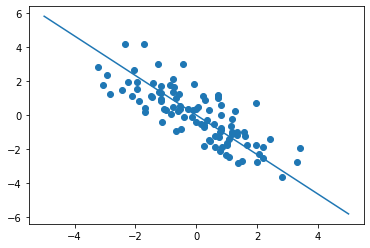

In [15]:
pca_eigvec, _ = pca(X,2)
first_eigvec = pca_eigvec[0]
X2 = center_data(X)
plt.scatter(X2[:,0],X2[:,1])

x = np.linspace(-5, 5, 1000)
y = first_eigvec[1]/first_eigvec[0] * x
plt.plot(x,y)
#plt.plot(x, y2)

### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

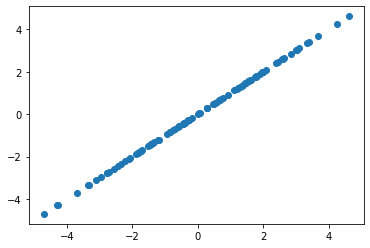

In [16]:
_,P = pca(X,1)
plt.scatter(P[:,0],P[:,0])


## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.

In [17]:
X,y = syntheticdata.get_synthetic_data_with_labels1()


### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

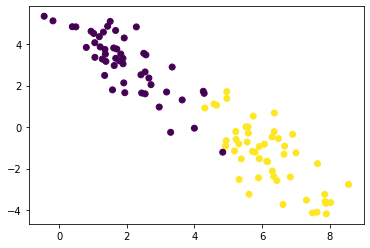

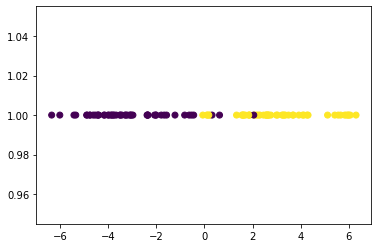

In [18]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])
plt.figure()
_,P = pca(X,1)
plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])



**Comment:** Enter your comment here.

- Based on the plot of original data in two dimension, and the plot of the reconstructed data in one dimension, there's no visible loss of information when reconstructing the data using only one dimension. 

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.

In [19]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

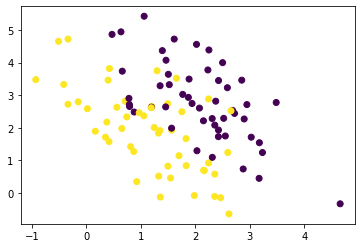

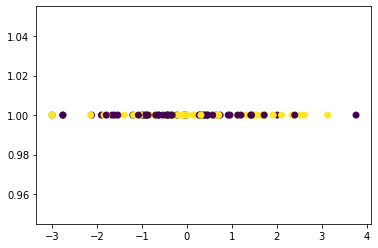

In [20]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])
plt.figure()
_,P = pca(X,2)
plt.scatter(P[:,0],np.ones(P[:,0].shape[0]),c=y[:,0])

**Comment:** Enter your comment here.

- We can now observe that using the first eigenvector to reconsturct data in one dimension, results in discernible loss of information in the data set(corruption of data/failed reconstruction).Thus we can conclude that using the first eigenvector gives unwanted results for this particular dataset, which is contradictory to what we're used to in theory, that says that the first eigenvector follows the direction of most variance. 

How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?

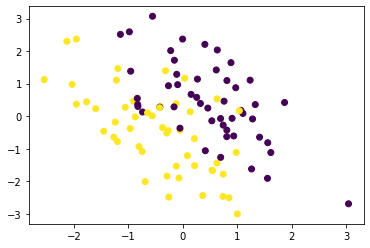

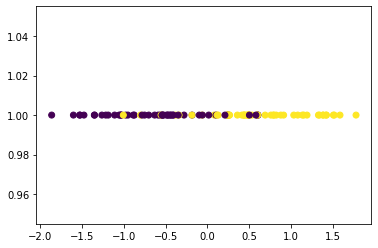

In [21]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])
plt.figure()
_,P = pca(X,2)
plt.scatter(P[:,1],np.ones(P[:,1].shape[0]),c=y[:,0])

**Answer**: Enter your answer here.

- Because the data is formed in a different way from the first dataset, namely, having the classes separated along a axis orthogonal to the spread of the classes in the first labeled dataset. The second eigen vector will therefore deliver better results than the first one, even though the first eigenvector does indeed move in the direction of maximal variance. 

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [22]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

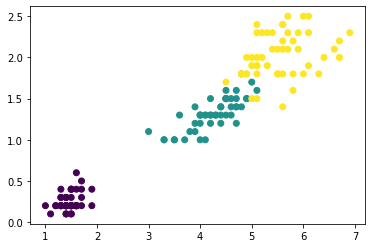

In [23]:

#plt.scatter(X[:,1],X[:,2],c=y[:,])
plt.scatter(X[:,2],X[:,3],c=y[:,])
#plt.scatter(X[:,0],X[:,2],c=y[:,])
#plt.scatter(X[:,1],X[:,3],c=y[:,])
#plt.figure()

### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

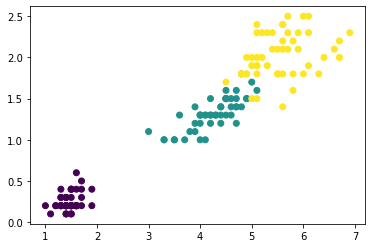

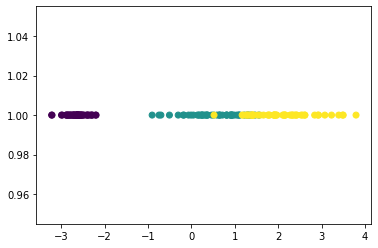

In [24]:
plt.scatter(X[:,2],X[:,3],c=y[:,])
plt.figure()
_,P = pca(X,4)
plt.scatter(P[:,0],np.ones(P[:,0].shape[0]),c=y[:])

**Comment:** Enter your comment here.

- After experimenting with the features that give the best visualization of the different types of irises, and then processing the data using pca, we see that even in one dimension, pca is able to reconstruct the data correctly. There's no visible loss of information, and as it turns out, I also found the features that give a plot well corresponding with the one dimensional processed data. I conclude that the first eigenvector follows the direction of maximal variance. 

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 

In [25]:
X,y,h,w = syntheticdata.get_lfw_data()
print(X[0,:].reshape(h,w).shape)


(62, 47)


### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

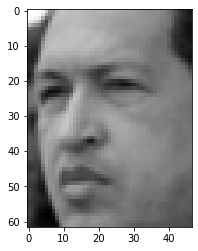

In [44]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.

In [64]:
def encode_decode_pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    
    centered_A = center_data(A)
    cov_matrix = compute_covariance_matrix(centered_A)
    eigval, eigvec = compute_eigenvalue_eigenvectors(cov_matrix)
    
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    print(centered_A.shape[0])
    
    pca_eigvec = sorted_eigvec[:,:m]
    P = np.dot(pca_eigvec.T, centered_A.T)
    Ahat = np.dot(pca_eigvec, P).T  
  
    return Ahat

### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [65]:
Xhat = encode_decode_pca(X,200)

1288


**Comment:** 
- I assume that I'm to use the PCA-function on the whole 1280x2914 matrix, and not on single pictures contained within it (This will arise an error if the single image is not reshaped). The reconstruction part of the original data shape is performed jus by computing the scalar-product of the eigenvectors and the Prinicpal components, and the transposing it.

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

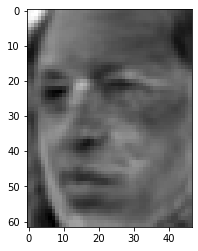

In [49]:
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

**Comment:** Enter your comment here.

- There's a clear loss of information/resolution in the pictures, even though we still maintain the most important amount of variation in the picture to be able to distuingish the faces and most of their characteristics. Based upon the results, I conclude that better results are achieved with a higher amount of low dimensions, as will be possible to see in the next sub-task. 

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.

(1288, 2914)
(1288, 2914)
(1288, 2914)
(1288, 2914)
(1288, 2914)


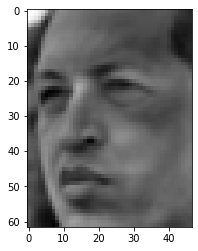

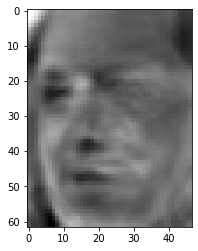

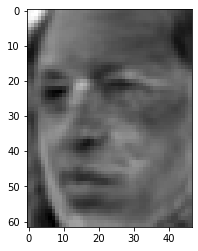

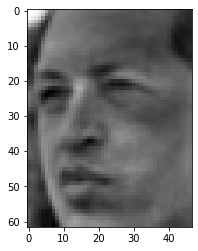

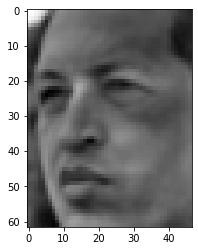

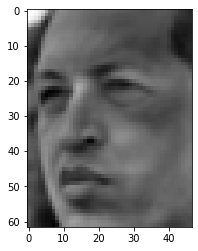

In [63]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

Xhat1 = encode_decode_pca(X,100)
Xhat2 = encode_decode_pca(X,200)
Xhat3 = encode_decode_pca(X,500)
Xhat4 = encode_decode_pca(X,1000)
Xhat5 = encode_decode_pca(X,1500)

plt.figure()
plt.imshow(Xhat1[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()
plt.imshow(Xhat2[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()
plt.imshow(Xhat3[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()
plt.imshow(Xhat4[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()
plt.imshow(Xhat5[0,:].reshape((h, w)), cmap=plt.cm.gray)

#Xhat = encode_decode_pca(X,None)
#plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

None

**Comment:** Enter your comment here.
- We see that at about 500 dimension the loss of information becomes almost insignificant, only discrete changes in shades of gray are possible to be discerned when compared to the original picture or the picture where 1000 dimensions have been used. I therefore assume that 500 features is the minimal number of features/dimesions to keep most valuable inforamtion in the picture. 

## Master Students: PCA Tuning
If we use PCA for compression or decompression, it may be not trivial to decide how many dimensions to keep. In this section we review a principled way to decide how many dimensions to keep.

The number of dimensions to keep is the only *hyper-parameter* of PCA. A method designed to decide how many dimensions/eigenvectors is the *proportion of variance*:
$$ \textrm{POV}=\frac{\sum_{i=1}^{m}{\lambda_{i}}}{\sum_{j=1}^{M}{\lambda_{j}}}, $$
where $\lambda$ are eigenvalues, $M$ is the dimensionality of the original data, and $m$ is the chosen lower dimensionality. 

Using the $POV$ formula we may select a number $M$ of dimensions/eigenvalues so that the proportion of variance is, for instance, equal to 95%.

Implement a new PCA for encoding and decoding that receives in input not the number of dimensions for projection, but the amount of proportion of variance to be preserved.

In [191]:
def encode_decode_pca_with_pov(A,p):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # p    float number between 0 and 1 denoting the POV to be preserved
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    # m    integer reporting the number of dimensions selected
    centered_A = center_data(A)
    cov_matrix = compute_covariance_matrix(centered_A)
    eigval, eigvec = compute_eigenvalue_eigenvectors(cov_matrix)
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    
    number = np.sum(sorted_eigval)*p
    R = np.array(np.cumsum(sorted_eigval))
    m = [n for n,i in enumerate(R) if i >= number][0]
   
    pca_eigvec = sorted_eigvec[:,:m+1].copy()
    P = np.dot(pca_eigvec.T, centered_A.T)
    Ahat = np.dot(pca_eigvec, P).T  
  
    return Ahat, m

Import the *lfw* dataset using the *get_lfw_data()* in *syntheticdata*. Use the implemented function to encode and decode the data by projecting on a lower dimensional space such that POV=0.9. Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

In [192]:
X,y,h,w = syntheticdata.get_lfw_data()

In [201]:
Xhat,m = encode_decode_pca_with_pov(X,0.90)

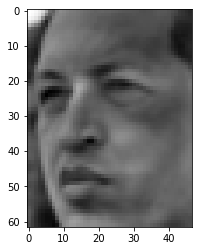

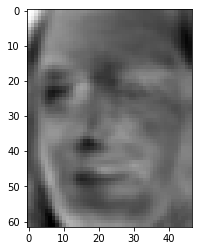

In [202]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

**Comment:** Enter your comment here.

- I see a deformation of the face in the picture after processing it with PCA, almost as if the person has experianced terrible burns on the face. Seems as though the proportion of variance has to be adjusted more, although it's still possible to discern a face on the image. The area of the image that experiances the most loss of resolution/information, is the left eye (On our right). All in all, I would say that the important information is kept, as mentioned earlier, we're still able to recognize the contours of a face, and some of it's charateristics. However, the fine details visible in the original picture are however gone.  

# K-Means Clustering (Bachelor and master students)
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.

In [206]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [207]:
X,y = syntheticdata.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.

In [306]:
# I assume that since no other comment has been given, I am to use my implementation of PCA
_,P = pca(X, 2)

### Running k-means
We will now consider the *iris* data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

In [300]:
KM = KMeans(n_clusters=2)
yhat2 = KM.fit_predict(P)


### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

Text(0.5, 1.0, 'Original data')

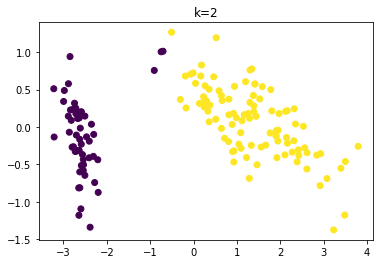

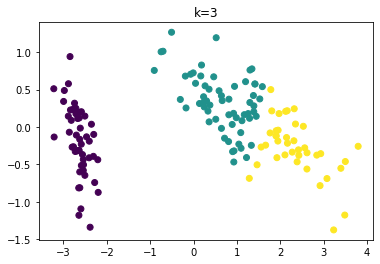

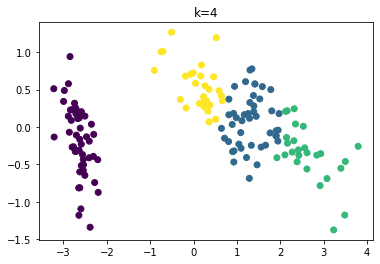

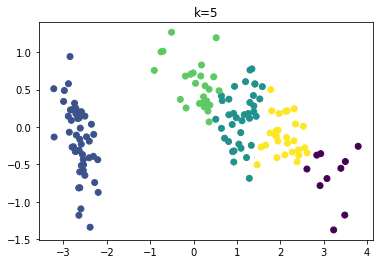

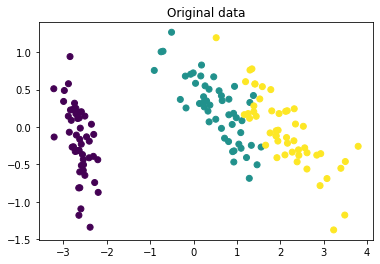

In [337]:
plt.scatter(P[:,0],P[:,1],c=yhat2)
plt.title('k=2')

# Repeat for k=3, 4 and 5:
KM = KMeans(n_clusters=3)
yhat3 = KM.fit_predict(P)
plt.figure()
plt.scatter(P[:,0],P[:,1],c=yhat3)
plt.title('k=3')

KM = KMeans(n_clusters=4)
yhat4 = KM.fit_predict(P)
plt.figure()
plt.scatter(P[:,0],P[:,1],c=yhat4)
plt.title('k=4')

KM = KMeans(n_clusters=5)
yhat5 = KM.fit_predict(P)
plt.figure()
plt.scatter(P[:,0],P[:,1],c=yhat5)
plt.title('k=5')

plt.figure()
plt.scatter(P[:,0],P[:,1],c=y)
plt.title('Original data')

**Comment:** Enter your comment here.

- from the results above, it's easy to see that the KMeans algorithm clusters well for K=2,3. It performs really well, for separating the left most class on the plot from the two others for k=2. When using k=3, it does overall pretty good, however, since the two classes of irises on the right overlapp each other to a certain degree (outliers of their classes), THe algorithm clusters some of them wrong. Interestingly enough, it's able to cluster into even more groups when using a value of K>3, altough both you and I know that it would be an overfit to classfiy beyond three classes. This is obvious, as the original data contains no more tham three classes. 

# Quantitative Assessment of K-Means (Bachelor and master students)

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes output by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

Accuracy when training on PCA-output(two first dimensions):  0.9666666666666667
Accuracy when training on K-means(k=2) one-hot-encoded output:  0.6666666666666666
Accuracy when training on K-means(k=3) one-hot-encoded output:  0.8866666666666667
Accuracy when training on K-means(k=4) one-hot-encoded output:  0.84
Accuracy when training on K-means(k=5) one-hot-encoded output:  0.8933333333333333


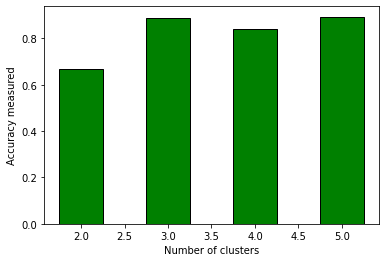

In [418]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

X,y = syntheticdata.get_iris_data()
lr = LogisticRegression() 
lr.fit(P, y)
pred = lr.predict(P)
acc1 = metrics.accuracy_score(pred,y)
print("Accuracy when training on PCA-output(two first dimensions): ",acc1)
#--------------------------------------------------------------------#
def one_hot_encode(Y): 
    return (np.arange(np.max(Y) +1) == Y[:, None]).astype('int')
yhat2_enc = one_hot_encode(yhat2)
yhat3_enc = one_hot_encode(yhat3)
yhat4_enc = one_hot_encode(yhat4)
yhat5_enc = one_hot_encode(yhat5)

lr2 = LogisticRegression()
lr2.fit(yhat2_enc,y)
pred2 = lr2.predict(yhat2_enc)
acc2 = metrics.accuracy_score(pred2,y)
print("Accuracy when training on K-means(k=2) one-hot-encoded output: ",acc2)

lr3 = LogisticRegression()
lr3.fit(yhat3_enc,y)
pred2 = lr3.predict(yhat3_enc)
acc3 = metrics.accuracy_score(pred2,y)
print("Accuracy when training on K-means(k=3) one-hot-encoded output: ",acc3)


lr4 = LogisticRegression()
lr4.fit(yhat4_enc,y)
pred2 = lr4.predict(yhat4_enc)
acc4 = metrics.accuracy_score(pred2,y)
print("Accuracy when training on K-means(k=4) one-hot-encoded output: ",acc4)

lr5 = LogisticRegression()
lr5.fit(yhat5_enc,y)
pred2 = lr5.predict(yhat5_enc)
acc5 = metrics.accuracy_score(pred2,y)
print("Accuracy when training on K-means(k=5) one-hot-encoded output: ",acc5)

accuracies_k = [acc2,acc3,acc4,acc5]
plt.bar([2,3,4,5], height=accuracies_k, width=0.5, edgecolor='black', color='green')
plt.xlabel("Number of clusters")
plt.ylabel("Accuracy measured")
plt.show()


**Comment:** Enter your comment here.

- It's clear that the best classification results are achieved when we train on the output opf the PCA compared to one hot encoded outputs of K-means algorithm for different values of k. Looking at the values of accuracy when the LR-model has been trained on the outputs show that training on k=3, gives good results, as should be anticipated. Surprisingly to me, the results achieved by LR when trained for five clusters are even higher than when training on k=3. I would usually argue that training for five different class of clusters pushes the model towards overfitting, hwoever since we do not possess a test set, and nor is the accuracy measured higher than that achieved by fitting on the output of the PCA, I will just say that the result is unexpectedly high in my opinion, as I thaught more then three labels would lower the value. If you take a look at the accuracy achieved by LR when trained on yhat4_enc (one hot encoded output for K=4 on K-means) it gets a lower result than for yhat3_enc, hence why I am a bit suprised by the result. 

# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and we applied it to another prototypical unsupervised learning problem: **clustering**; we used *k-means* to process the *iris* dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms. 